In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
from astropy.table import Table

In [524]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [525]:
df_2000s = df[["dt", "AverageTemperature", "State"]].loc[df["dt"] >= "2000-01-01"]
df_2000s

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [526]:
dates = pd.to_datetime(df_2000s["dt"])
df_2000s["dt"] = dates

In [527]:
df_2000s

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [528]:
filtered_df_temps = df_2000s.loc[df_2000s["State"].isin(["Wyoming", "Nebraska", "South Dakota"])]
filtered_df_temps

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [529]:
df_by_date = filtered_df_temps.groupby("dt", as_index=False).agg(Average_Temperature = ("AverageTemperature", "mean"))
df_by_date

,dt,Average_Temperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


Text(0, 0.5, 'Average Temperature')

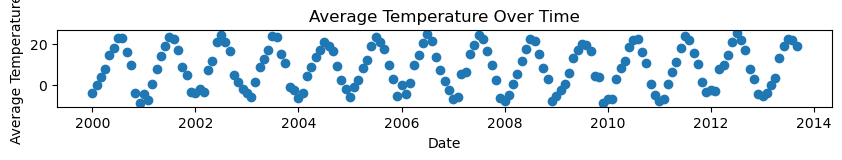

In [530]:
plt.figure(figsize=(10,1))
plt.scatter(df_by_date["dt"], df_by_date["Average_Temperature"])
plt.title("Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature")

In [531]:
df_temps = df_by_date.copy()
df_temps["dt"] = ((df_temps["dt"] - df_temps["dt"].min()).dt.total_seconds() / (365.25 * 24 * 3600))+2000
time = df_temps["dt"]
temps = df_temps["Average_Temperature"]
df_temps

,dt,Average_Temperature
0,2000.000000,-4.072000
1,2000.084873,-0.205000
2,2000.164271,3.642667
3,2000.249144,7.609667
4,2000.331280,14.255000
...,...,...
160,2013.330595,13.196000
161,2013.415469,18.783667
162,2013.497604,22.110333
163,2013.582478,21.890000


In [532]:
def sine(x, amplitude, frequency, phase, vert_shift):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase) + vert_shift

p0 = [15, 1, -1.5, 8]

params, cov = fit.curve_fit(sine, time, temps, p0)

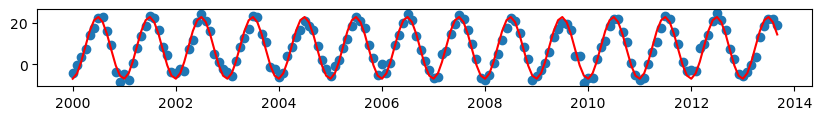

In [533]:
plt.figure(figsize=(10,1))
plt.scatter(time, temps)
plt.plot(time, sine(time, *p0), color="red")

In [534]:
amp = str(np.round(params[0], 2))
freq = str(np.round(params[1], 2))
phase = str(np.round(params[2], 2))
shift = str(np.round(params[3], 2))

amp_error = str(np.round(cov[0,0], 2))
freq_error = str(np.round(cov[1,1], 2))
phase_error = str(np.round(cov[2,2], 2))
shift_error = str(np.round(cov[3,3], 2))

In [535]:
print("Amplitude =", amp, "±" + amp_error)
print("Frequency =", freq, "±" + freq_error)
print("Phase =", phase, "±" + phase_error)
print("Vertical Shift =", shift, "±" + shift_error)

Amplitude = 13.92 ±0.05
Frequency = 1.0 ±0.0
Phase = 5.97 ±69.13
Vertical Shift = 8.17 ±0.03


In [536]:
print("y =", amp, "* sin(" + freq + "x +", phase + ") + " + shift)

y = 13.92 * sin(1.0x + 5.97) + 8.17


***

In [538]:
table = Table.read("global_CCl4_MM.dat", format = "ascii")

In [539]:
table

CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
int64,int64,float64,float64,float64,float64,float64,float64
1996,1,nan,nan,nan,nan,nan,nan
1996,2,nan,nan,nan,nan,nan,nan
1996,3,nan,nan,nan,nan,nan,nan
1996,4,105.318,0.197,102.969,0.238,104.144,0.155
1996,5,105.032,0.193,102.754,0.287,103.893,0.174
1996,6,105.327,0.277,103.086,0.273,104.207,0.191
1996,7,105.25,0.171,103.021,0.233,104.136,0.147
1996,8,104.855,0.239,102.817,0.213,103.836,0.161
1996,9,104.909,0.248,102.813,0.441,103.861,0.254


In [540]:
df_means = table.to_pandas()[["CCl4ottoyr", "CCl4ottomon", "CCl4ottoGLm","CCl4ottoGLsd"]]
df = df_means.dropna()
df.columns = ["year", "month", "global_mean_concentration", "global_sd"]
df

,year,month,global_mean_concentration,global_sd
3,1996,4,104.144,0.155
4,1996,5,103.893,0.174
5,1996,6,104.207,0.191
6,1996,7,104.136,0.147
7,1996,8,103.836,0.161
...,...,...,...,...
278,2019,3,79.008,0.199
279,2019,4,78.623,0.149
280,2019,5,78.862,0.226
281,2019,6,78.598,0.165


In [574]:
df.loc[:, 'fractional_year'] = df['year'] + (df['month'] - 1) / 12

In [576]:
x_time = df["fractional_year"]
y_mean = df["global_mean_concentration"][~np.isnan(df["global_mean_concentration"])]
error = df["global_sd"]

In [578]:
df

,year,month,global_mean_concentration,global_sd,fractional_year
3,1996,4,104.144,0.155,1996.250000
4,1996,5,103.893,0.174,1996.333333
5,1996,6,104.207,0.191,1996.416667
6,1996,7,104.136,0.147,1996.500000
7,1996,8,103.836,0.161,1996.583333
...,...,...,...,...,...
278,2019,3,79.008,0.199,2019.166667
279,2019,4,78.623,0.149,2019.250000
280,2019,5,78.862,0.226,2019.333333
281,2019,6,78.598,0.165,2019.416667


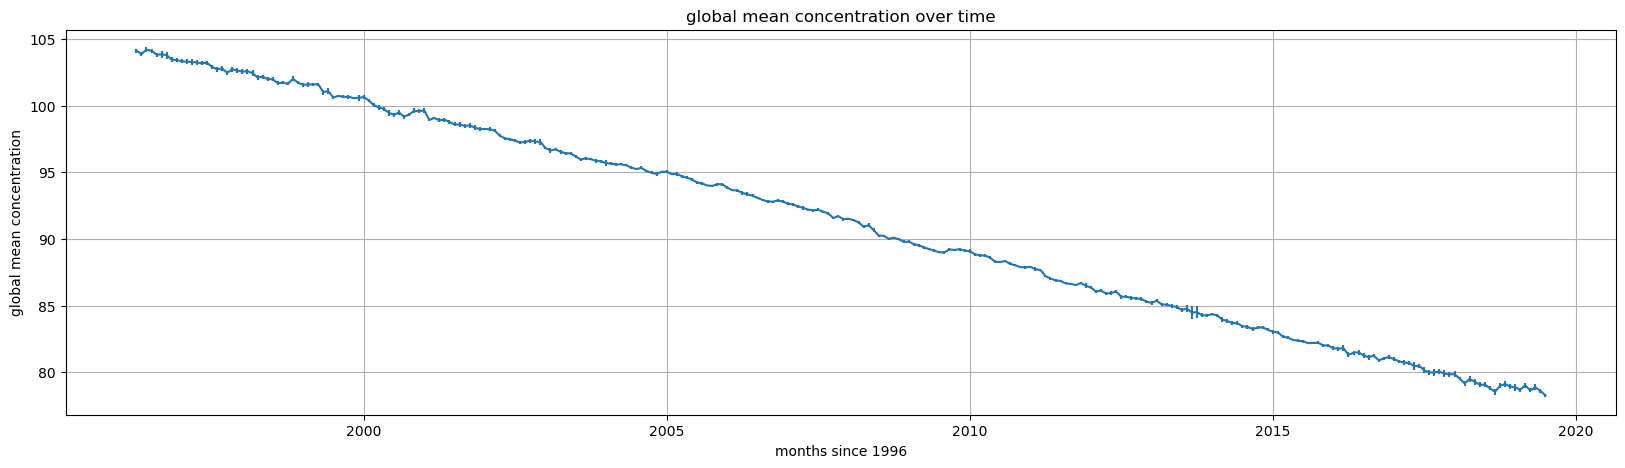

In [580]:
plt.figure(figsize=(20, 5))
plt.errorbar(x_time, y_mean, yerr=error)
plt.xlabel("months since 1996")
plt.ylabel("global mean concentration")
plt.title("global mean concentration over time")
plt.grid()

In [581]:
y_exp

3      104.615592
4      104.520088
5      104.424584
6      104.329081
7      104.233577
          ...    
278     78.352101
279     78.256598
280     78.161094
281     78.065590
282     77.970087
Name: fractional_year, Length: 280, dtype: float64

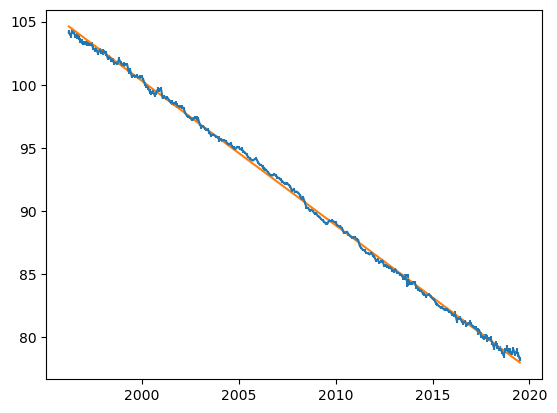

In [584]:
def f(x, m, b):
    return m*x + b

params1, cov1 = fit.curve_fit(f, x_time, y_mean)
m = params1[0]
b = params1[1]
y_exp = f(x_time, m, b)

plt.figure()
plt.errorbar(x_time, y_mean, yerr=error)
plt.plot(x_time, y_exp)

In [586]:
red_chi_sq = (sum(((y_mean - y_exp)**2)/y_exp))/2
red_chi_sq

0.09422759578076245

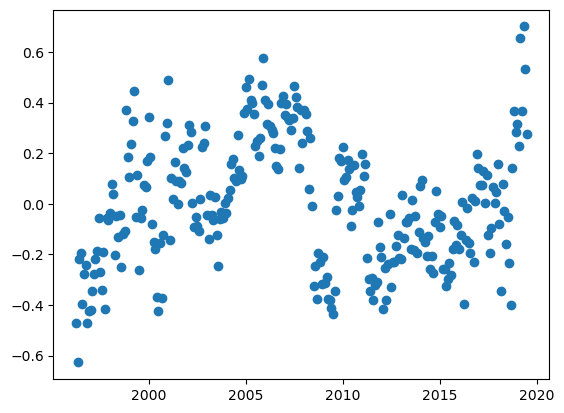

In [588]:
residuals = y_mean - y_exp

plt.figure()
plt.scatter(x_time, residuals)

In [605]:
slope = str(np.round(m, 2))
intercept = str(np.round(b, 2))

slope_error = str(cov1[0,0])
intercept_error = str(cov[1,1])

In [609]:
print("Slope =", slope, "±" + slope_error)
print("Intercept =", intercept, "±" + intercept_error)
print("Reduced chi squared =", np.round(red_chi_sq))

Slope = -1.15 ±4.858694516573549e-06
Intercept = 2392.4 ±4.3479322661816305e-07
Reduced chi squared = 0.09422759578076245


In [613]:
print("y =", slope + "*x +", intercept)

y = -1.15*x + 2392.4
